In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 960.7 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [22]:
len(y_train)

60000

In [23]:
x_train =x_train/255
x_test =x_test/255

In [52]:
len(y_test)

10000

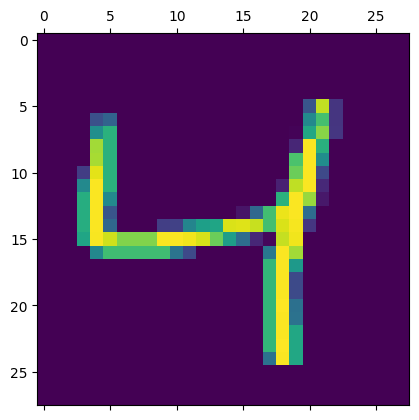

In [11]:
plt.matshow(x_train[2])

In [30]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [32]:
x_train_flatten.shape
x_test_flatten.shape

(10000, 784)

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']


)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4685 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9251


In [45]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2677 - accuracy: 0.9254


[0.26771122217178345, 0.9254000186920166]

In [46]:
y_pred = model.predict(x_test_flatten)
np.argmax(y_pred[0])

313/313 [==============================] - 2s 1ms/step


7

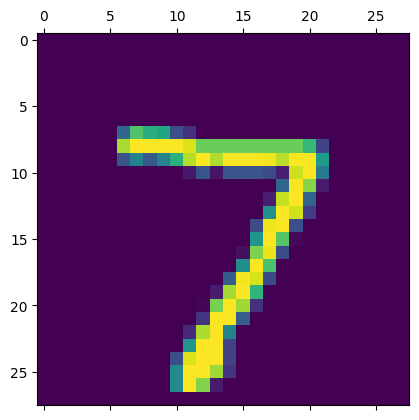

In [48]:
plt.matshow(x_test[0])

In [54]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [55]:
confusionmatrix = tf.math.confusion_matrix(labels = y_test,predictions=y_pred_labels)
confusionmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    7,  923,   15,    9,    6,   12,   11,   38,    4],
       [   4,    0,   18,  920,    0,   30,    2,   11,   18,    7],
       [   2,    1,    2,    1,  920,    0,   11,    4,    9,   32],
       [  10,    1,    3,   25,    8,  795,   13,    4,   27,    6],
       [  13,    3,    5,    1,    8,   17,  907,    2,    2,    0],
       [   1,    5,   21,    6,    8,    1,    0,  952,    3,   31],
       [   7,    7,    7,   21,    9,   38,    9,   11,  858,    7],
       [  11,    6,    1,   10,   36,   10,    0,   25,    7,  903]])>

In [59]:
!pip install seaborn



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(95.72222222222221, 0.5, 'truth')

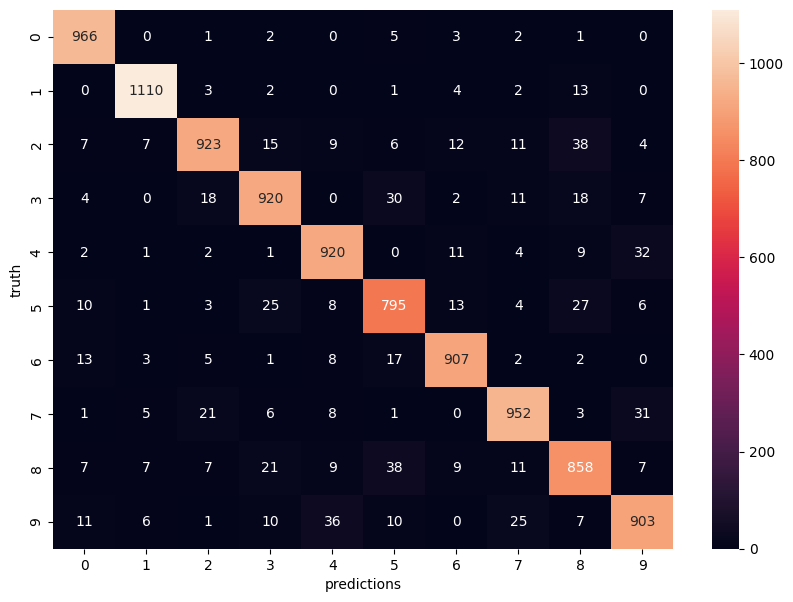

In [58]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusionmatrix,annot=True,fmt='d')
plt.xlabel("predictions")
plt.ylabel("truth")

In [61]:
model = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation="relu"),
        keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']


)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2718 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1226 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0647 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9838


In [62]:
##hence the accuracy increase when adding some dense layer
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9773


[0.07265811413526535, 0.9772999882698059]